# Task 1 - User Overview analysis 

### Import Libraries

In [2]:
# Import Libraries
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [3]:
%matplotlib inline
#display-related options
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)

## Import Data

In [4]:
CSV_PATH = "../data/processed/processed.csv"

In [5]:
# taking a csv file path and reading a dataframe

def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [6]:
## getting number of columns, row and column information
def get_data_info(xDR_df: pd.DataFrame):
    
    row_count, col_count = xDR_df.shape
    
    print(f"Number of rows: {row_count}")
    print(f"Number of columns: {col_count}")

    return xDR_df.info()

In [7]:
## basic statistics of each column and see the data at glance
def get_statistics_info(xDR_df: pd.DataFrame):
    
    return xDR_df.describe(include='all')

In [8]:
# reading the extracted tellco data and getting information

xDR_df = read_proccessed_data(CSV_PATH)

get_data_info(xDR_df)
get_statistics_info(xDR_df)

file read as csv
Number of rows: 150001
Number of columns: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms) 

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500e+05,150000,150001.000,150000,150001.000,1.500e+05,1.500e+05,1.500e+05,1.500e+05,150001,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,1.500e+05,1.500e+05,1.500e+05,150001,150001,150001.000,150001.000,1.500e+05,150001.000,1.500e+05,1.500e+05,1.500e+05,150001.000,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05
unique,NaN,9997,NaN,6403,NaN,NaN,NaN,NaN,NaN,45548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170,1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/26/2019 7:25,NaN,4/25/2019 0:01,NaN,NaN,NaN,NaN,NaN,Uknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apple,Huawei B528S-23A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,203,NaN,1150,NaN,NaN,NaN,NaN,NaN,1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59826,19790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.014e+19,NaN,499.188,NaN,498.801,1.046e+05,2.082e+14,4.182e+10,4.846e+13,NaN,109.796,17.663,13300.046,1770.429,92.845,3.069,1.717,1.610,98.530,0.777,0.148,0.079,1.829e+06,1.409e+06,1.046e+08,NaN,NaN,3719.788,4022.083,1.795e+06,32928.434,5.751e+06,2.057e+06,1.792e+06,467373.442,1.163e+07,1.101e+07,1.163e+07,1.100e+07,4.220e+08,8.288e+06,4.211e+08,8.265e+06,4.112e+07,4.546e+08
std,2.893e+18,NaN,288.611,NaN,288.097,8.104e+04,2.145e+10,2.439e+12,2.241e+13,NaN,559.343,76.530,23971.799,4625.340,13.005,6.200,4.149,4.817,4.622,3.217,1.620,1.292,5.696e+06,4.643e+06,8.104e+07,NaN,NaN,9148.498,10133.432,1.035e+06,19006.178,3.309e+06,1.190e+06,1.036e+06,269969.307,6.711e+06,6.345e+06,6.725e+06,6.359e+06,2.440e+08,4.783e+06,2.432e+08,4.769e+06,1.128e+07,2.441e+08
min,6.918e+18,NaN,0.000,NaN,0.000,7.142e+03,2.040e+14,3.360e+10,4.400e+11,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,7.143e+06,NaN,NaN,1.000,1.000,1.200e+01,0.000,2.070e+02,3.000e+00,1.400e+01,2.000,5.300e+01,1.050e+02,4.200e+01,3.500e+01,2.516e+03,5.900e+01,3.290e+03,1.480e+02,2.867e+06,7.114e+06
25%,7.350e+18,NaN,250.000,NaN,251.000,5.744e+04,2.082e+14,3.365e+10,3.546e+13,NaN,35.000,3.000,43.000,47.000,91.000,0.000,0.000,0.000,99.000,0.000,0.000,0.000,1.488e+04,2.154e+04,5.744e+07,NaN,NaN,88.000,107.000,8.991e+05,16448.000,2.882e+06,1.024e+06,8.928e+05,233383.000,5.834e+06,5.518e+06,5.777e+06,5.476e+06,2.105e+08,4.128e+06,2.102e+08,4.146e+06,3.322e+07,2.431e+08
50%,7.350e+18,NaN,499.000,NaN,500.000,8.640e+04,2.082e+14,3.366e+10,3.572e+13,NaN,54.000,7.000,63.000,63.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,3.930e+04,4.679e+04,8.640e+07,NaN,NaN,205.000,220.000,1.794e+06,32920.000,5.766e+06,2.055e+06,1.794e+06,466250.000,1.162e+07,1.101e+07,1.164e+07,1.100e+07,4.234e+08,8.291e+06,4.218e+08,8.267e+06,4.114e+07,4.558e+08
75%,1.304e+19,NaN,749.000,NaN,750.000,1.324e+05,2.082e+14,3.368e+10,8.612e+13,NaN,109.796,17.663,19710.000,1120.000,100.000,4.000,1.000,1.000,100.000,0.000,0.000,0.000,6.796e+05,5.991e+05,1.324e+08,NaN,NaN,2765.000,2560.000,2.695e+06,4933

In [64]:
xDR_df.sample(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
31979,7.278e+18,4/24/2019 17:55,704.0,4/26/2019 6:12,367.0,130637.0,2.082e+14,3.369e+10,3.589e+13,L85838B,109.796,17.663,49.0,68.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,4.041e+04,3.886e+04,1.306e+08,Samsung,Samsung Galaxy J3 (Sm-J330),243.0,276.0,2.783e+06,50759.0,1.111e+07,1.653e+06,1.841e+06,514802.0,1.866e+07,1.869e+07,1.303e+07,8.028e+06,2.878e+08,7.698e+06,5.520e+08,8.839e+06,4.548e+07,3.352e+08
73875,1.304e+19,4/26/2019 8:58,270.0,4/27/2019 8:58,252.0,86399.0,2.082e+14,3.366e+10,3.542e+13,D77532B,50.000,4.000,407.0,476.0,100.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,4.886e+04,4.847e+04,8.640e+07,Samsung,Samsung Galaxy A3 (Sm-A310X),283.0,196.0,1.035e+06,5281.0,2.783e+06,8.785e+05,1.013e+06,556966.0,1.014e+06,1.614e+07,1.478e+07,1.998e+07,2.317e+08,1.363e+07,2.987e+06,4.525e+06,5.571e+07,2.523e+08
122415,7.350e+18,4/28/2019 4:53,219.0,4/29/2019 10:47,572.0,107588.0,2.082e+14,3.363e+10,3.554e+13,D73135A,16.000,0.000,47.0,51.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.890e+04,2.336e+04,1.076e+08,Apple,Apple iPhone Se (A1723),94.0,142.0,2.150e+06,9611.0,5.545e+06,1.343e+06,3.246e+06,9816.0,6.644e+05,2.164e+07,2.244e+07,1.249e+07,7.806e+08,7.544e+06,4.546e+08,8.339e+06,5.137e+07,8.147e+08
96387,7.350e+18,4/27/2019 16:37,451.0,4/28/2019 3:33,1.0,39362.0,2.082e+14,3.376e+10,3.557e+13,D12729C,109.796,17.663,51.0,55.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.074e+04,2.121e+04,3.936e+07,Apple,Apple iPhone 6S Plus (A1687),50.0,101.0,1.989e+06,52212.0,8.603e+06,7.245e+05,3.383e+06,423650.0,6.075e+06,1.347e+07,1.989e+07,1.048e+07,8.917e+07,1.278e+07,8.297e+08,4.026e+06,4.196e+07,1.291e+08
66133,1.304e+19,4/26/2019 7:34,837.0,4/27/2019 7:34,804.0,86399.0,2.082e+14,3.376e+10,8.638e+13,T23787A,57.000,23.000,36027.0,13890.0,85.0,4.0,4.0,5.0,98.0,1.0,0.0,0.0,7.529e+06,5.428e+06,8.640e+07,Huawei,Huawei B528S-23A,23250.0,22371.0,3.333e+06,20089.0,4.995e+06,1.140e+06,1.341e+06,681736.0,1.993e+07,1.703e+07,5.568e+06,1.307e+07,3.182e+08,1.109e+07,1.792e+08,2.156e+06,4.518e+07,3.534e+08


## Top 10 handsets used by the customers

In [65]:
xDR_df['Handset Type'].value_counts().head(10)

Huawei B528S-23A                19790
Apple iPhone 6S (A1688)          9452
Apple iPhone 6 (A1586)           9062
undefined                        9018
Apple iPhone 7 (A1778)           6361
Apple iPhone Se (A1723)          5210
Apple iPhone 8 (A1905)           5027
Apple iPhone Xr (A2105)          4585
Samsung Galaxy S8 (Sm-G950F)     4540
Apple iPhone X (A1901)           3825
Name: Handset Type, dtype: int64

## Top 3 handset manufacturers

In [66]:
top_manufacturers=xDR_df['Handset Manufacturer'].value_counts().head(3)
top_manufacturers

Apple      59826
Samsung    40980
Huawei     34527
Name: Handset Manufacturer, dtype: int64

## Top 5 handsets per top 3 handset manufacturer

In [67]:
x = xDR_df[xDR_df["Handset Manufacturer"].isin(top_manufacturers.keys())]
x['Handset Type'].groupby(xDR_df['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9452
                      Apple iPhone 6 (A1586)             9062
                      Apple iPhone 7 (A1778)             6361
                      Apple iPhone Se (A1723)            5210
                      Apple iPhone 8 (A1905)             5027
Huawei                Huawei B528S-23A                  19790
                      Huawei E5180                       2085
                      Huawei P20 Lite Huawei Nova 3E     2030
                      Huawei P20                         1482
                      Huawei Y6 2018                     1002
Samsung               Samsung Galaxy S8 (Sm-G950F)       4540
                      Samsung Galaxy A5 Sm-A520F         3736
                      Samsung Galaxy J5 (Sm-J530)        3704
                      Samsung Galaxy J3 (Sm-J330)        3494
                      Samsung Galaxy S7 (Sm-G930X)       3212
Name: Handset Typ

# Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   
### Aggregate per user the following information in the column  
    number of xDR sessions
    Session duration
    the total download (DL) and upload (UL) data
    the total data volume (in Bytes) during this session for each application


### Number of xDR sessions

In [68]:
xDR_df.groupby('MSISDN/Number')['Bearer Id'].count().nlargest(10)

MSISDN/Number
3.363e+10    18
3.361e+10    17
3.363e+10    17
3.366e+10    16
3.368e+10    15
3.376e+10    15
3.367e+10    13
3.360e+10    12
3.360e+10    12
3.363e+10    12
Name: Bearer Id, dtype: int64

### Session duration

In [69]:
xDR_df.groupby('MSISDN/Number')['Dur. (ms)'].sum().nlargest(10)

MSISDN/Number
3.363e+10    1.855e+07
3.361e+10    9.967e+06
3.376e+10    9.279e+06
3.363e+10    8.792e+06
3.367e+10    8.745e+06
3.366e+10    6.614e+06
3.366e+10    6.289e+06
3.360e+10    6.288e+06
3.367e+10    5.650e+06
3.376e+10    5.322e+06
Name: Dur. (ms), dtype: float64

### The total download (DL) and upload (UL) data

In [70]:
xDR_df.groupby('MSISDN/Number')[['Total DL (Bytes)',
                             'Total UL (Bytes)']].sum().nlargest(10, ['Total DL (Bytes)',
                                                                      'Total UL (Bytes)'])

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.361e+10,8.157e+09,6.895e+08
3.376e+10,7.811e+09,7.035e+08
3.363e+10,7.770e+09,7.296e+08
3.368e+10,7.310e+09,5.816e+08
3.363e+10,7.302e+09,6.697e+08
3.366e+10,7.082e+09,6.243e+08
3.367e+10,6.903e+09,4.051e+08
3.376e+10,6.611e+09,5.215e+08
3.366e+10,6.401e+09,4.712e+08


###  The total data volume (in Bytes) during this session for each application

In [71]:
#the total data volume (in Bytes) during this session for each application
xDR_df['Youtube'] = xDR_df['Youtube DL (Bytes)'] + xDR_df['Youtube UL (Bytes)']
xDR_df['Google'] = xDR_df['Google DL (Bytes)'] + xDR_df['Google UL (Bytes)']
xDR_df['Email'] = xDR_df['Email DL (Bytes)'] + xDR_df['Email UL (Bytes)']

xDR_df['Netflix'] = xDR_df['Netflix DL (Bytes)'] + xDR_df['Netflix UL (Bytes)']
xDR_df['Gaming'] = xDR_df['Gaming DL (Bytes)'] + xDR_df['Gaming UL (Bytes)']
xDR_df['Other'] = xDR_df['Other DL (Bytes)'] + xDR_df['Other UL (Bytes)']
xDR_df['SocialMedia'] = xDR_df['Social Media DL (Bytes)'] + xDR_df['Social Media UL (Bytes)']

xDR_df['All'] = xDR_df['Total DL (Bytes)'] + xDR_df['Total UL (Bytes)']

In [72]:
#the total data volume (in Bytes) during this session for each application
xDR_df.groupby('MSISDN/Number').agg({'Youtube': 'sum','Google': 'sum','Email': 'sum','Netflix': 'sum','Gaming': 'sum','Other': 'sum','SocialMedia': 'sum','All':'sum' }).head(10)

,Youtube,Google,Email,Netflix,Gaming,Other,SocialMedia,All
MSISDN/Number,,,,,,,,
3.360e+10,2.162e+07,4.389e+06,1.331e+06,2.718e+07,8.125e+08,3.866e+08,2.232e+06,8.787e+08
3.360e+10,1.243e+07,5.335e+06,3.308e+06,1.122e+07,1.198e+08,2.817e+08,2.661e+06,1.569e+08
3.360e+10,2.133e+07,3.443e+06,3.205e+06,1.935e+07,5.388e+08,5.017e+08,3.196e+06,5.960e+08
3.360e+10,6.977e+06,9.678e+06,2.285e+06,1.942e+06,3.911e+08,3.528e+07,2.803e+05,4.223e+08
3.360e+10,4.153e+07,1.850e+07,3.305e+06,4.920e+07,1.315e+09,8.048e+08,2.913e+06,1.457e+09
3.360e+10,3.435e+07,1.526e+07,7.849e+06,3.032e+07,5.116e+08,4.924e+08,3.793e+06,6.152e+08
3.360e+10,2.643e+07,1.020e+07,1.359e+06,4.581e+07,5.485e+08,2.249e+08,2.770e+06,6.547e+08
3.360e+10,1.889e+07,1.202e+07,2.216e+06,1.529e+07,2.824e+08,1.782e+08,1.783e+06,3.327e+08
3.360e+10,6.344e+07,1.413e+07,4.600e+06,5.422e+07,8.331e+08,1.042e+09,5.289e+06,9.901e+08


## Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights. 

###  Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

In [73]:
xDR_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bearer Id,150001.0,1.014e+19,2.893e+18,6.918e+18,7.350e+18,7.350e+18,1.304e+19,1.319e+19
Start ms,150001.0,4.992e+02,2.886e+02,0.000e+00,2.500e+02,4.990e+02,7.490e+02,9.990e+02
End ms,150001.0,4.988e+02,2.881e+02,0.000e+00,2.510e+02,5.000e+02,7.500e+02,9.990e+02
Dur. (ms),150001.0,1.046e+05,8.104e+04,7.142e+03,5.744e+04,8.640e+04,1.324e+05,1.859e+06
IMSI,150001.0,2.082e+14,2.145e+10,2.040e+14,2.082e+14,2.082e+14,2.082e+14,2.141e+14
MSISDN/Number,150001.0,4.182e+10,2.439e+12,3.360e+10,3.365e+10,3.366e+10,3.368e+10,8.824e+14
IMEI,150001.0,4.846e+13,2.241e+13,4.400e+11,3.546e+13,3.572e+13,8.612e+13,9.900e+13
Avg RTT DL (ms),150001.0,1.098e+02,5.593e+02,0.000e+00,3.500e+01,5.400e+01,1.098e+02,9.692e+04
Avg RTT UL (ms),150001.0,1.766e+01,7.653e+01,0.000e+00,3.000e+00,7.000e+00,1.766e+01,7.120e+03
Avg Bearer TP DL (kbps),150001.0,1.330e+04,2.397e+04,0.000e+00,4.300e+01,6.300e+01,1.971e+04,3.782e+05


##### This basic metrics gives information about the distribution of the data. it might not be useful for some columns like Bearer Id and other which are related to ID because they are more of catatagorical data. But from the given information for others this basic metrics will tell us the kind of distribution it is based on the values of mean median and sd. We can identify outliners by using min max values. 

##  Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 

In [74]:
cols = ['Youtube',
        'Google',
        'Email',
        'Netflix',
        'Gaming',
        'Other',
        'SocialMedia',
        'All']

In [75]:
xDR_df[cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Youtube,150001.0,2.264e+07,9.247e+06,7.890e+04,1.600e+07,2.266e+07,2.929e+07,4.519e+07
Google,150001.0,7.807e+06,3.516e+06,4.033e+04,4.944e+06,7.813e+06,1.068e+07,1.553e+07
Email,150001.0,2.259e+06,1.071e+06,8.359e+03,1.359e+06,2.264e+06,3.160e+06,4.518e+06
Netflix,150001.0,2.263e+07,9.261e+06,9.843e+04,1.598e+07,2.264e+07,2.929e+07,4.520e+07
Gaming,150001.0,4.303e+08,2.440e+08,3.064e+05,2.187e+08,4.316e+08,6.414e+08,8.592e+08
Other,150001.0,4.294e+08,2.433e+08,1.490e+05,2.186e+08,4.300e+08,6.399e+08,8.595e+08
SocialMedia,150001.0,1.828e+06,1.036e+06,1.563e+03,9.322e+05,1.826e+06,2.727e+06,3.651e+06
All,150001.0,4.958e+08,2.444e+08,2.896e+07,2.845e+08,4.969e+08,7.065e+08,9.560e+08


#### By taking the total data volume for each application and the whole data volume we measure certain characteristics' of data. The goal is to better understand the sample distribution and make some conclusion about the population distribution.

### For the rest of the EDA I choose the following columns
    - Bearer Id to identify each session -Categorical
    - Dur. (ms) Total Duration of the xDR (in ms) -Numerical
    - MSISDN/Number	 Unique customer Id -Categorical
    - Handset Manufacturer categorical
    - Handset Type    categorical
    - Youtube =YouTube DL (Bytes)+YouTube UL (Bytes) Numerical
    - Google = Google DL (Bytes) + Google UL (Bytes) Numerical
    - Email =Email DL (Bytes)+ Email UL (Bytes)      Numerical
    - Netflix=Netflix DL (Bytes)+Netflix UL (Bytes)  Numerical
    - Gaming= Gaming DL (Bytes)+Gaming UL (Bytes)    Numerical
    - SocialMedia=Social Media DL (Bytes)+Social Media UL (Bytes) Numerical
    - Other=  Other DL+ Other UL                     Numerical
    - All= Total DL (Bytes) +Total UL (Bytes)        Numerical
    
    


In [76]:
EDA_df = xDR_df[[
        'Bearer Id',
        'MSISDN/Number', 
        'Handset Manufacturer', 
        'Handset Type', 
        'Dur. (ms)', 
        'Youtube',
        'Google',
        'Email',
        'Netflix',
        'Gaming',
        'Other',
        'SocialMedia',
        'All'
                                ]]
EDA_df.sample(5)

,Bearer Id,MSISDN/Number,Handset Manufacturer,Handset Type,Dur. (ms),Youtube,Google,Email,Netflix,Gaming,Other,SocialMedia,All
42291,7.350e+18,3.366e+10,Apple,Apple iPhone 6S Plus (A1687),100745.0,1.350e+07,6.609e+06,1.218e+06,2.267e+07,5.936e+08,8.205e+08,2.567e+06,6.433e+08
134498,1.311e+19,3.362e+10,Apple,Apple iPhone Se (A1723),168276.0,2.636e+07,1.729e+06,1.694e+06,2.043e+07,5.030e+08,7.667e+08,1.597e+05,5.643e+08
113183,1.311e+19,3.378e+10,Apple,Apple iPhone 6 (A1586),86341.0,1.991e+07,6.337e+06,7.343e+05,3.490e+07,1.507e+08,1.320e+08,2.835e+05,2.222e+08
133182,1.304e+19,3.365e+10,undefined,undefined,152873.0,4.342e+06,4.235e+06,2.010e+06,2.487e+07,5.352e+08,6.747e+08,2.252e+05,5.737e+08
37882,7.278e+18,3.366e+10,Huawei,Huawei E5180,86399.0,2.585e+07,7.563e+06,1.007e+06,1.816e+06,3.051e+08,1.290e+08,2.406e+06,3.555e+08


## Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.

In [77]:
# plotting functions
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    

def plot_dist(df:pd.DataFrame, column:str):
    plt.figure(figsize=(9,7))
    sns.distplot(df).set_title(f'Distribution of {column}')
    


def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    


<Figure size 648x504 with 0 Axes>

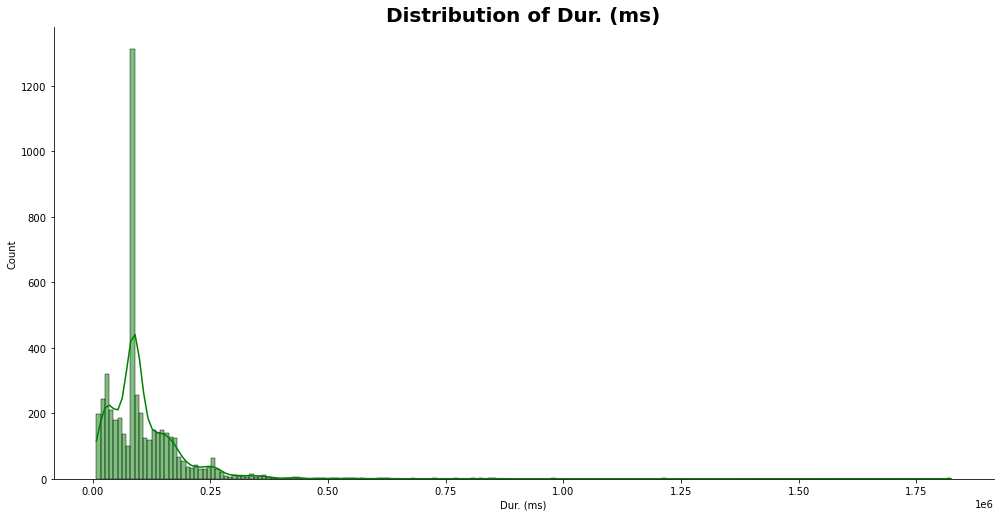

In [78]:
plot_hist(EDA_df.sample(5000), 'Dur. (ms)', color='green')

This show us that the Duration distribution is negatively skewed and there are outliners in the data.

<Figure size 648x504 with 0 Axes>

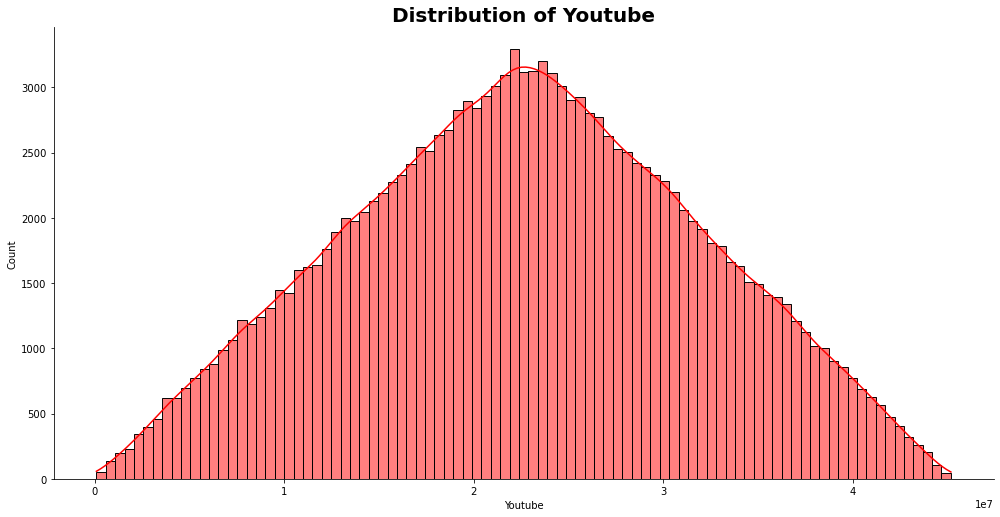

<Figure size 648x504 with 0 Axes>

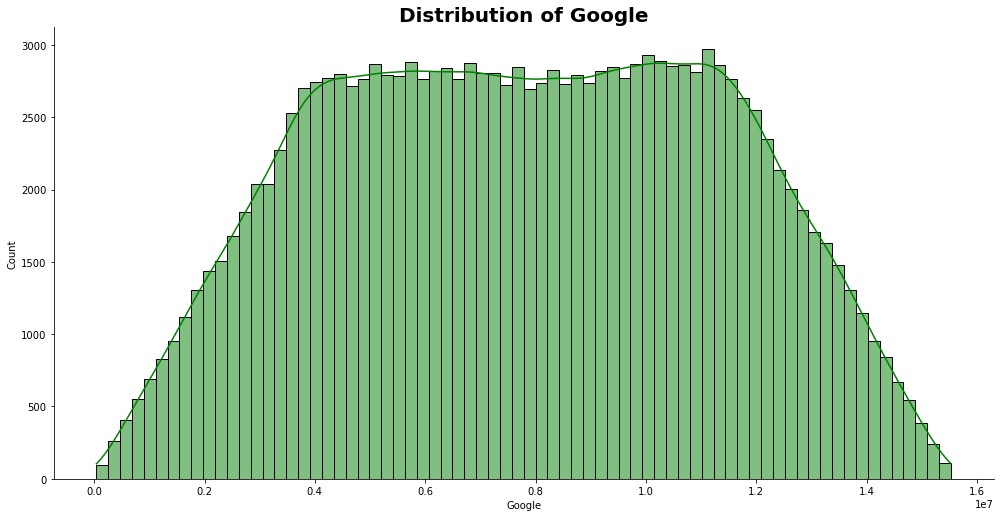

<Figure size 648x504 with 0 Axes>

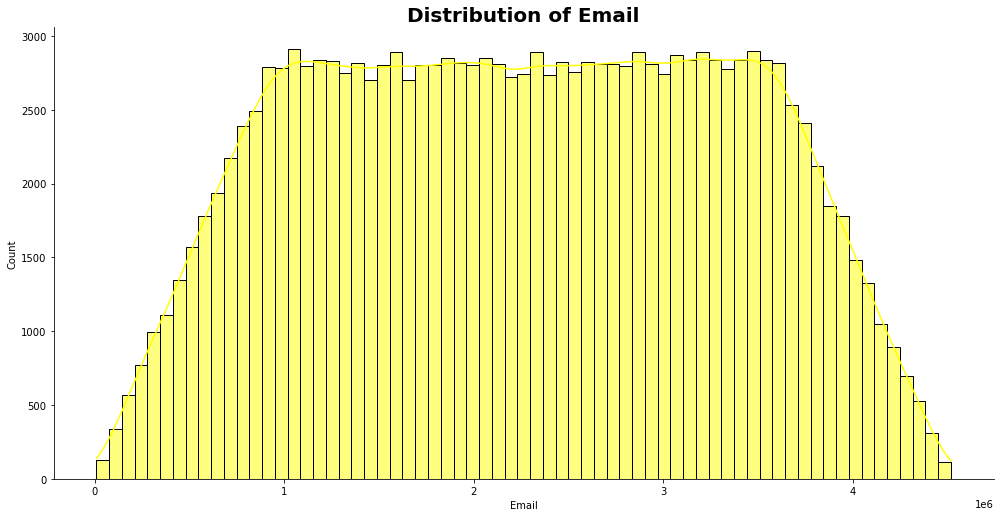

<Figure size 648x504 with 0 Axes>

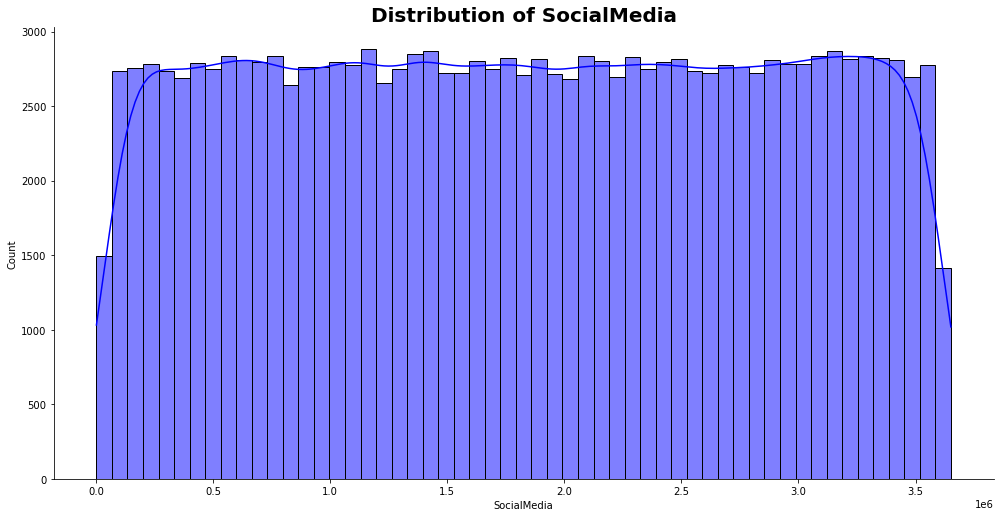

<Figure size 648x504 with 0 Axes>

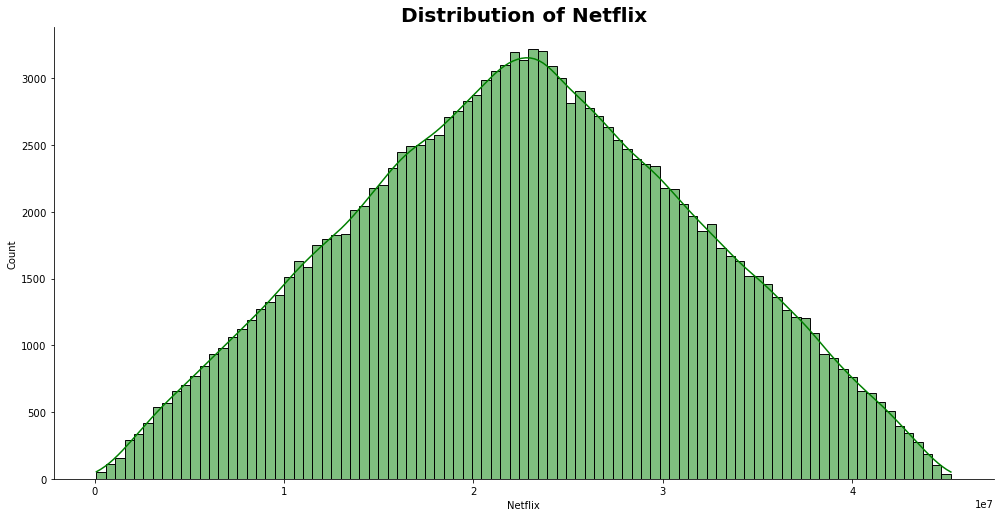

<Figure size 648x504 with 0 Axes>

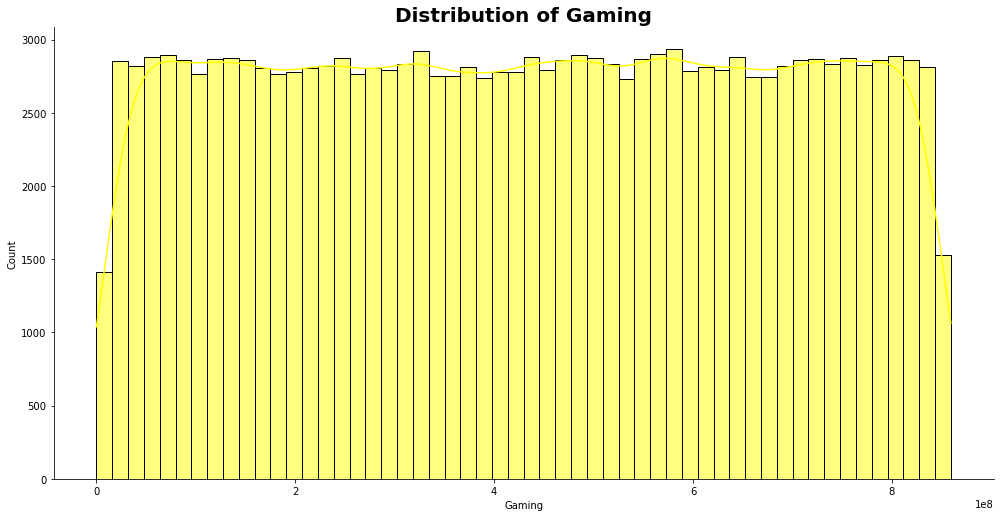

<Figure size 648x504 with 0 Axes>

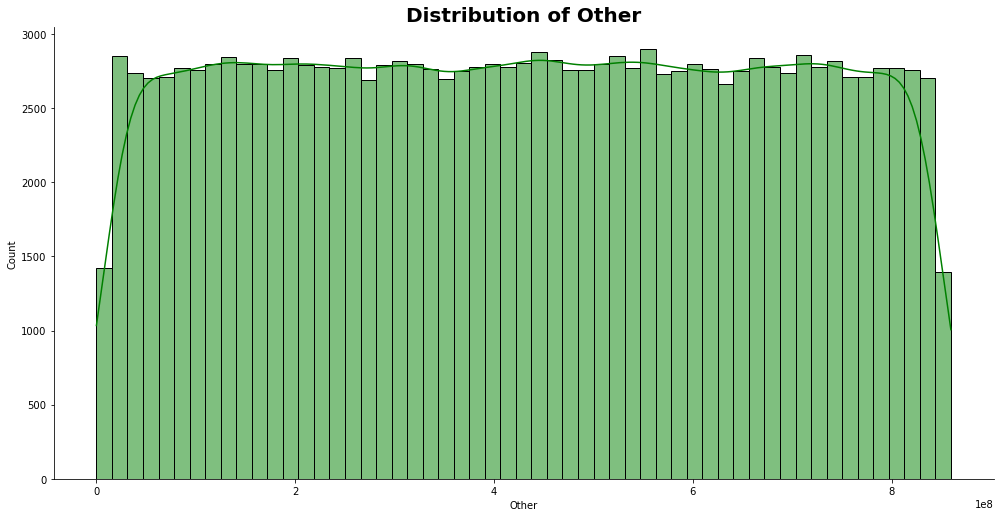

<Figure size 648x504 with 0 Axes>

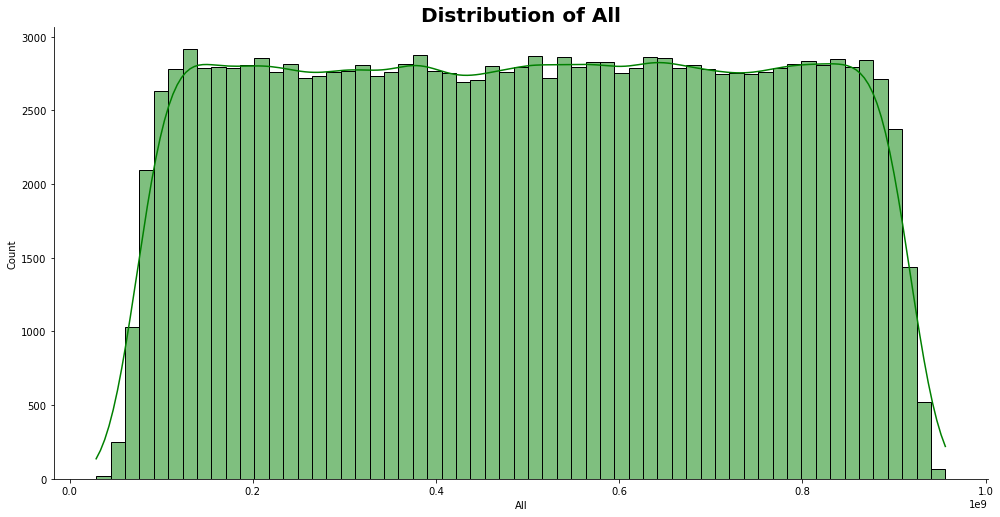

In [79]:

plot_hist(EDA_df, 'Youtube', color='red')
plot_hist(EDA_df, 'Google', color='green')
plot_hist(EDA_df, 'Email', color='yellow')
plot_hist(EDA_df, 'SocialMedia', color='blue')
plot_hist(EDA_df, 'Netflix', color='green')
plot_hist(EDA_df, 'Gaming', color='yellow')
plot_hist(EDA_df, 'Other', color='green')
plot_hist(EDA_df, 'All', color='green')

          





As we can see from the Above distributions the total dat useage for each application and the total dat usage is more of normal distribution.

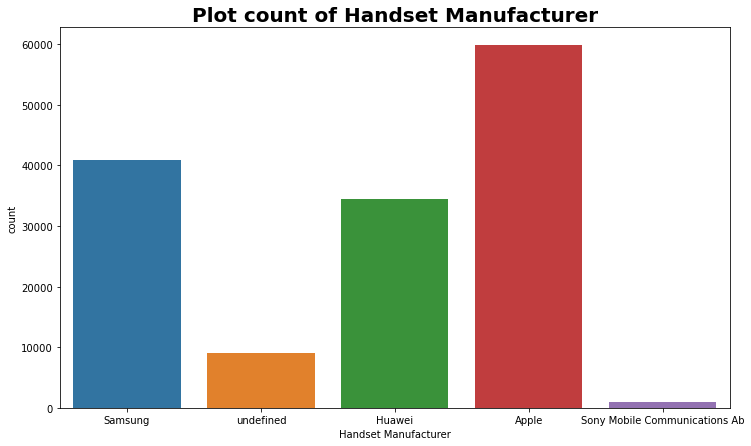

In [80]:
filter_row = EDA_df['Handset Manufacturer'].isin(EDA_df['Handset Manufacturer'].value_counts().head(5).index[:5].to_list())
count_df = EDA_df[filter_row]
plot_count(count_df, 'Handset Manufacturer')

In [83]:
total_data = EDA_df[['MSISDN/Number', 
        'Dur. (ms)', 
        'Youtube',
        'Google',
        'Email',
        'Netflix',
        'Gaming',
        'Other',
        'SocialMedia',
        'All']]
total_data_agg = total_data.groupby('MSISDN/Number').sum()
total_data_agg

,Dur. (ms),Youtube,Google,Email,Netflix,Gaming,Other,SocialMedia,All
MSISDN/Number,,,,,,,,,
3.360e+10,116720.0,2.162e+07,4.389e+06,1.331e+06,2.718e+07,8.125e+08,3.866e+08,2.232e+06,8.787e+08
3.360e+10,181230.0,1.243e+07,5.335e+06,3.308e+06,1.122e+07,1.198e+08,2.817e+08,2.661e+06,1.569e+08
3.360e+10,134969.0,2.133e+07,3.443e+06,3.205e+06,1.935e+07,5.388e+08,5.017e+08,3.196e+06,5.960e+08
3.360e+10,49878.0,6.977e+06,9.678e+06,2.285e+06,1.942e+06,3.911e+08,3.528e+07,2.803e+05,4.223e+08
3.360e+10,37104.0,4.153e+07,1.850e+07,3.305e+06,4.920e+07,1.315e+09,8.048e+08,2.913e+06,1.457e+09
...,...,...,...,...,...,...,...,...,...
3.379e+10,8810.0,2.665e+07,7.531e+06,1.007e+06,1.490e+07,6.604e+08,2.953e+08,3.002e+05,7.146e+08
3.379e+10,140988.0,1.985e+07,5.430e+06,2.514e+06,8.531e+06,4.370e+08,2.111e+08,4.986e+05,4.803e+08
3.197e+12,877385.0,1.196e+07,1.044e+07,1.521e+06,2.659e+07,1.780e+08,4.705e+08,7.152e+05,2.321e+08


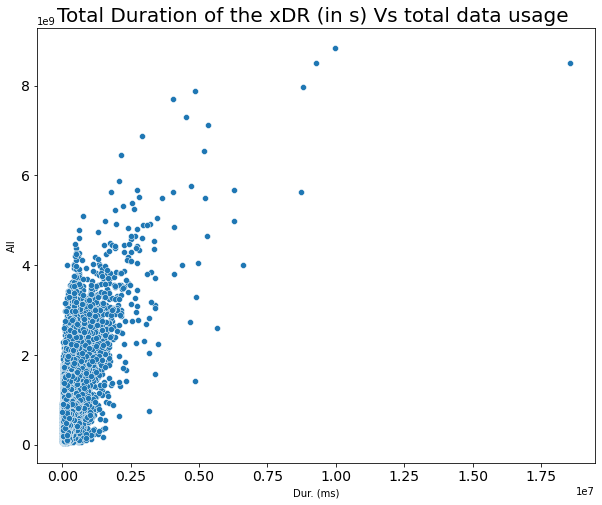

In [85]:
plot_scatter(total_data_agg, 'Dur. (ms)', 'All', 'Total Duration of the xDR (in s) Vs total data usage ',  None,  None)

This shows there is a week relation ship between Total Duration of the xDR (in s) Vs total data usage

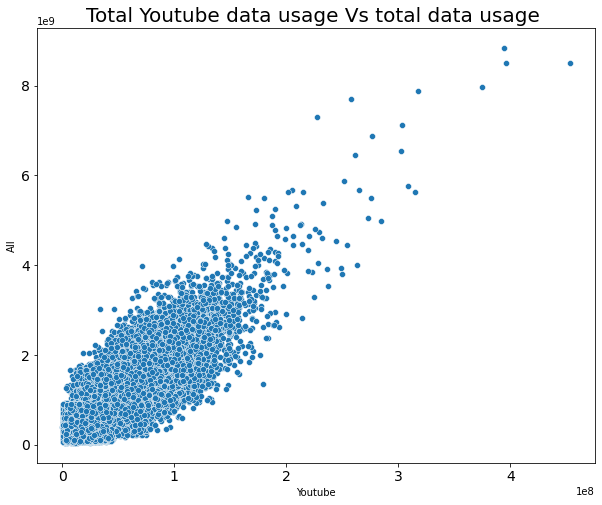

In [87]:
plot_scatter(total_data_agg, 'Youtube', 'All', 'Total Youtube data usage Vs total data usage ',  None,  None)

This shows there is a moderate posetive relationship between Total Youtube data usage Vs total data usage.

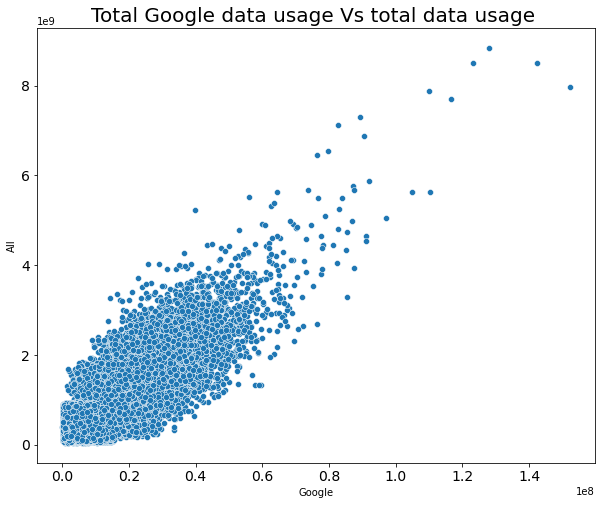

In [91]:
plot_scatter(total_data_agg, 'Google', 'All', 'Total Google data usage Vs total data usage ',  None,  None)

This shows there is a moderate posetive relationship between Total Google data usage Vs total data usage.

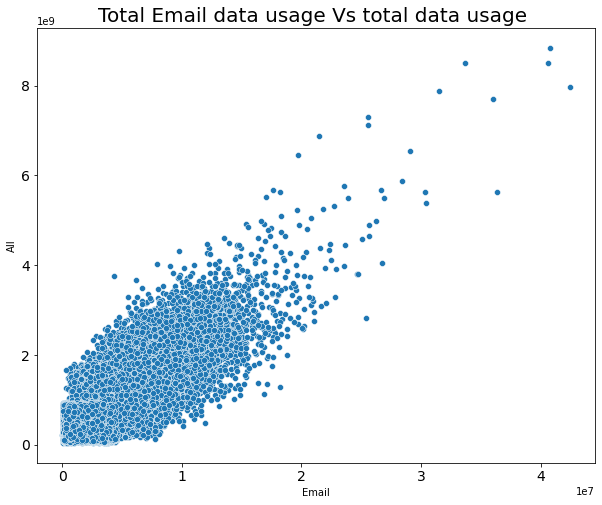

In [90]:
plot_scatter(total_data_agg, 'Email', 'All', 'Total Email data usage Vs total data usage ',  None,  None)

This shows there is a moderate posetive relationship between Total Email data usage Vs total data usage.

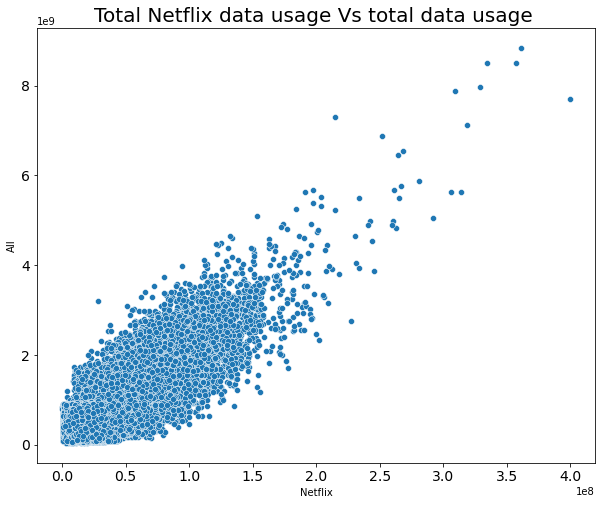

In [92]:
plot_scatter(total_data_agg, 'Netflix', 'All', 'Total Netflix data usage Vs total data usage ',  None,  None)

This shows there is a moderate posetive relationship between Total Netflix data usage Vs total data usage.

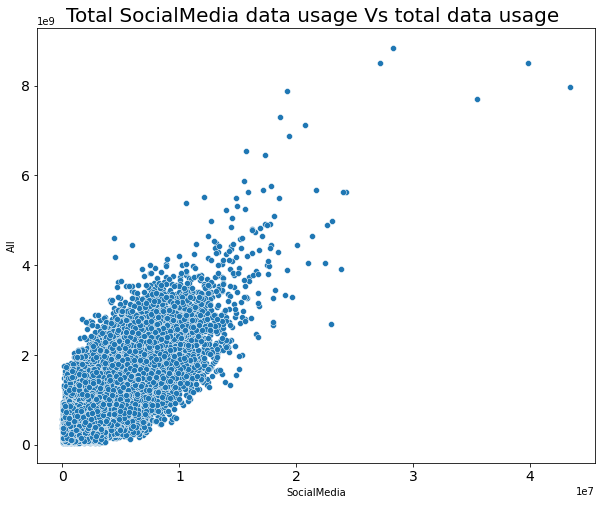

In [93]:
plot_scatter(total_data_agg, 'SocialMedia', 'All', 'Total SocialMedia data usage Vs total data usage ',  None,  None)

This shows there is a moderate posetive relationship between Total Netflix data usage Vs total data usage.

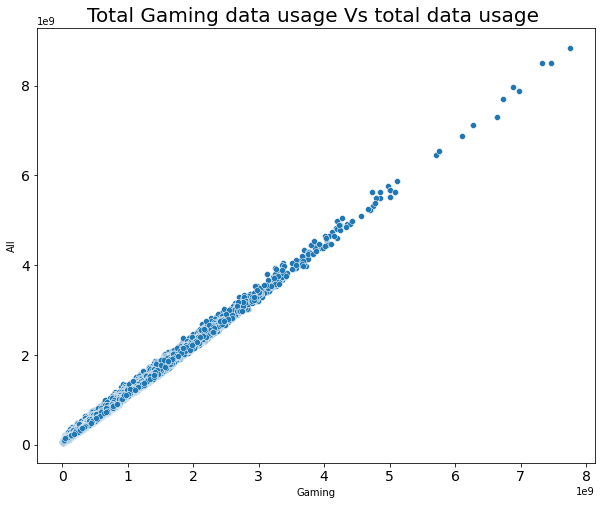

In [94]:
plot_scatter(total_data_agg, 'Gaming', 'All', 'Total Gaming data usage Vs total data usage ',  None,  None)

This shows there is a Strong  posetive relationship between Total Gamming data usage Vs total data usage.

In [96]:
total_data = EDA_df[['Youtube',
        'Google',
        'Email',
        'Netflix',
        'Gaming',
        'Other',
        'SocialMedia',
        'All'
                    ]]

In [101]:
social_media_total = total_data.sum()[6]
google_total = total_data.sum()[1]
email_total = total_data.sum()[2]
youtube_total = total_data.sum()[0]
netflix_total = total_data.sum()[3]
gaming_total = total_data.sum()[4]
other_data = total_data.sum()[5]
app_total_count_df = pd.DataFrame(columns=['app', 'total'])
app_total_count_df['app'] = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other_data']

app_total_count_df['total'] = [social_media_total, google_total, email_total, youtube_total, netflix_total, gaming_total,  other_data]
app_total_count_df

,app,total
0,social_media,2.742e+11
1,google,1.171e+12
2,email,3.389e+11
3,youtube,3.397e+12
4,netflix,3.394e+12
5,gaming,6.455e+13
6,other_data,6.441e+13


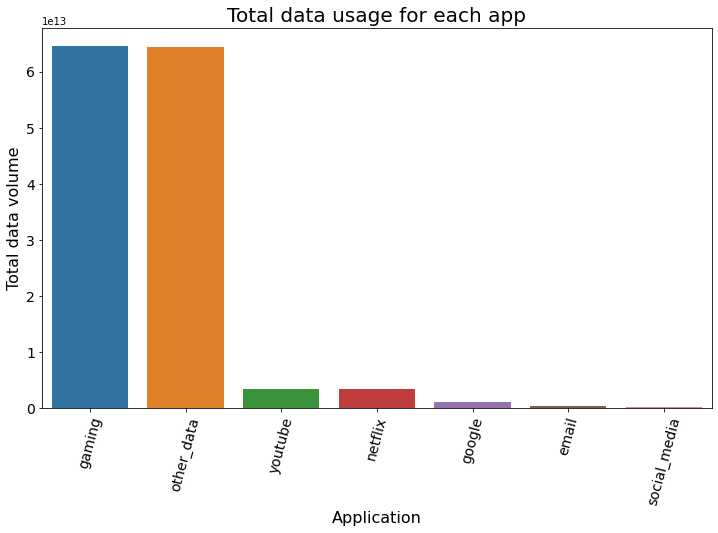

In [102]:
plot_bar(app_total_count_df.sort_values(by=['total'], ascending = False), x_col='app', y_col='total', title="Total data usage for each app", xlabel="Application", ylabel="Total data volume")


This show us that the company is generating more income from gaming and other application data usage.

## Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 

In [134]:

total_data = EDA_df[['MSISDN/Number', 
        'Dur. (ms)', 
        'All']]
total_data_and_du_agg = total_data.groupby('MSISDN/Number').sum()

deciles = pd.qcut(total_data_and_du_agg['Dur. (ms)'], 5, labels=["1st_decile", "2nd_decile",
                                                      "3rd_decile", "4th_decile",
                                                      "5th_decile"])

total_data_and_du_agg_with_decile = total_data_and_du_agg.copy()   
total_data_and_du_agg_with_decile['decile'] = deciles
total_data_and_du_agg_with_decile_agg = total_data_and_du_agg_with_decile.groupby('decile').agg({'All': 'sum',
                                                                                           'Dur. (ms)': 'sum'})

In [135]:
total_data_and_du_agg_with_decile_agg

,All,Dur. (ms)
decile,,
1st_decile,1.166e+13,6.514e+08
2nd_decile,1.254e+13,1.797e+09
3rd_decile,1.176e+13,2.152e+09
4th_decile,1.406e+13,3.459e+09
5th_decile,2.435e+13,7.633e+09


## Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 

In [136]:
total_data_of_applications = EDA_df[['Youtube',
        'Google',
        'Email',
        'Netflix',
        'Gaming',
        'Other',
        'SocialMedia',
                    ]]

In [137]:
total_data_of_applications_correlation = total_data_of_applications.corr()

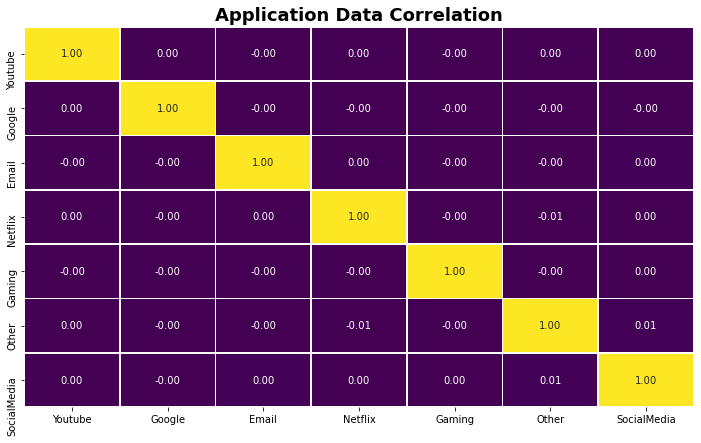

In [138]:
plot_heatmap(total_data_of_applications_correlation, 'Application Data Correlation')

As we can see from the heatmap the corelation between each application is very less we could say each data is important.

## Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results 

In [139]:
EDA_df.sample(5)



,Bearer Id,MSISDN/Number,Handset Manufacturer,Handset Type,Dur. (ms),Youtube,Google,Email,Netflix,Gaming,Other,SocialMedia,All
16838,7.350e+18,3.376e+10,Apple,Apple iPhone 7 (A1778),23651.0,2.952e+07,1.023e+07,2.181e+06,3.195e+07,6.710e+08,4.938e+08,6.349e+05,7.467e+08
115226,1.304e+19,3.369e+10,undefined,undefined,86399.0,4.067e+07,1.115e+07,7.236e+05,2.015e+07,8.747e+07,4.822e+08,2.804e+06,1.772e+08
47525,1.311e+19,3.366e+10,Samsung,Samsung Galaxy A5 Sm-A520F,128724.0,2.136e+07,8.875e+06,3.837e+06,1.911e+07,5.703e+08,6.332e+08,6.886e+04,6.292e+08
117941,1.304e+19,3.365e+10,HTC,Htc One A9,86399.0,2.759e+07,4.510e+06,3.555e+06,2.707e+07,6.307e+08,3.527e+08,2.524e+06,7.013e+08
118286,7.278e+18,3.366e+10,Huawei,Huawei B528S-23A,86399.0,3.851e+07,8.464e+06,1.819e+06,1.848e+07,6.169e+08,3.196e+08,3.371e+06,7.021e+08


In [140]:
DR_df=EDA_df[['Youtube',
        'Google',
        'Email',
        'Netflix',
        'Gaming',
        'Other',
        'SocialMedia',
        'All'
                    ]]
DR_df.sample(5)

,Youtube,Google,Email,Netflix,Gaming,Other,SocialMedia,All
28019,2.558e+06,1.103e+07,3.119e+06,1.286e+07,8.582e+08,6.744e+08,6.566e+05,8.949e+08
141850,3.206e+07,1.166e+07,1.608e+06,1.146e+07,7.550e+08,4.725e+08,3.180e+06,8.287e+08
32294,3.186e+07,7.366e+06,1.670e+06,2.730e+07,2.040e+08,5.083e+08,1.201e+06,2.826e+08
105543,4.654e+06,6.627e+06,3.445e+05,3.271e+07,7.094e+08,3.948e+08,3.173e+06,7.720e+08
130820,2.209e+07,1.101e+07,2.238e+06,2.450e+07,3.084e+08,3.644e+08,2.377e+06,3.842e+08


In [141]:
from sklearn.preprocessing import StandardScaler

In [143]:
scaler = StandardScaler()
scaler.fit(DR_df)

StandardScaler()

In [144]:
scaled_data = scaler.transform(DR_df)

In [145]:
from sklearn.decomposition import PCA

In [205]:
pca = PCA(1)

In [206]:
pca.fit(scaled_data)

PCA(n_components=1)

In [207]:
x_pca = pca.transform(scaled_data)

In [208]:
scaled_data.shape

(150001, 8)

In [209]:
x_pca.shape

(150001, 1)

In [210]:
pca.components_

array([[-0.02263749, -0.00876466, -0.00218777, -0.02251599, -0.70623793,
         0.00373576, -0.00458025, -0.70717184]])

In [211]:
df_comp = pd.DataFrame(pca.components_,columns=['Youtube',
        'Google',
        'Email',
        'Netflix',
        'Gaming',
        'Other',
        'SocialMedia',
        'All'])

<AxesSubplot:>

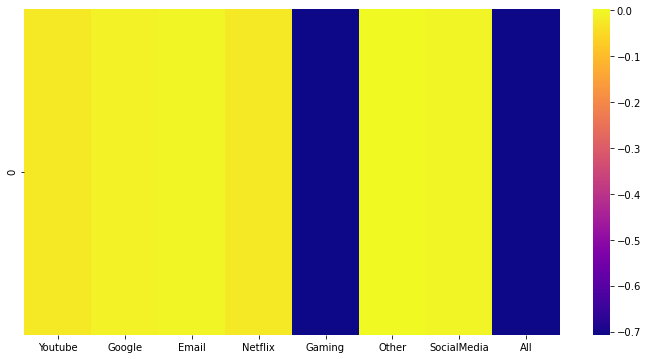

In [212]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This show us much of the data is realated to Gaming in the ALL. Gaming provide a great role in the overal data usage.